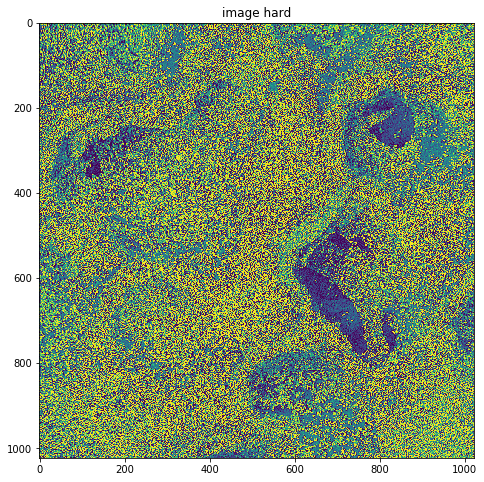

In [254]:
from skimage.measure import regionprops
import Dataset
import numpy as np
from Utils import visualize
from Utils import image_to_grayscale
from skimage import color

dataset_list = Dataset.get_full_dataset()
INDEX = 0
data = dataset_list[INDEX]
image, title = data['image'], data['title']

image = color.rgb2gray(image)

visualize(image, f'image {title}')


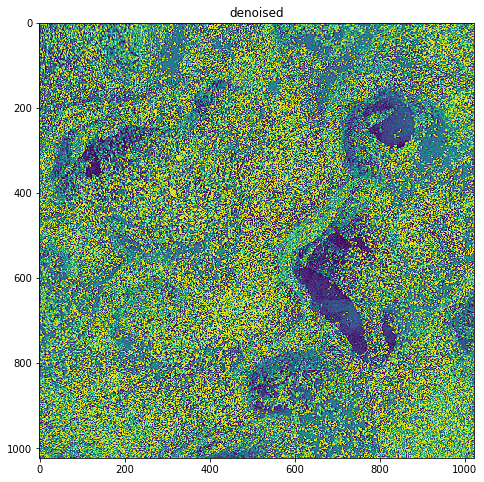

In [255]:
from skimage.filters import rank
from skimage.morphology import disk

denoised = rank.median(image, disk(1))

visualize(denoised, 'denoised')

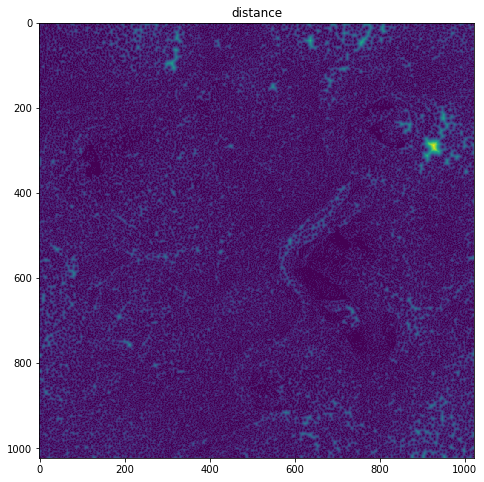

In [256]:
MINIMAL_GRAY = 40
MINIMAL_GRAY_MARKER = 100

from scipy.ndimage import distance_transform_edt

distance = distance_transform_edt(denoised > MINIMAL_GRAY)

visualize(distance, 'distance')

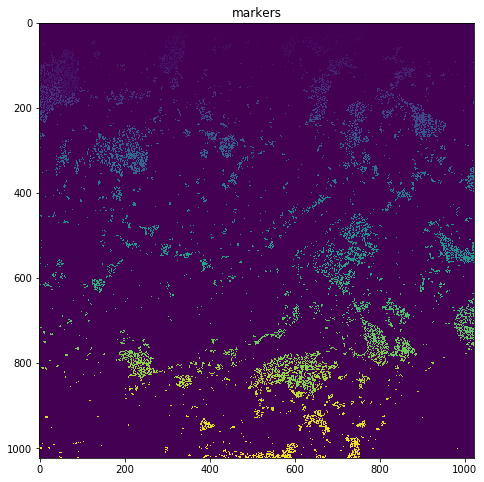

In [257]:
from scipy.ndimage import label

markers = label(denoised > MINIMAL_GRAY_MARKER)[0]

visualize(markers, 'markers')

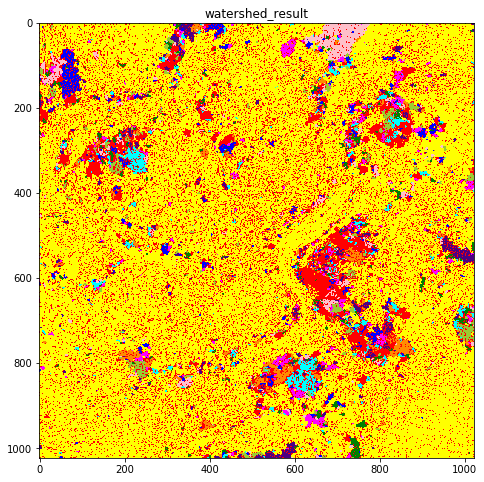

In [258]:
from skimage.morphology import watershed

watershed_result = watershed(-distance, 
                             markers, 
                             mask=denoised > MINIMAL_GRAY)

visualize(watershed_result, 'watershed_result')

In [259]:
MAX_REG = 1500
MIN_REG = 10

total_counter = 0

for region in regionprops(watershed_result):
    if not (MAX_REG > region.area > MIN_REG):
        continue
        
    total_counter += 1

print(f'total_counter {total_counter}')

total_counter 2481
